## Path-based decompositions

Monia Lupparelli, Giovanni M. Marchetti

December 2023


### Application of section 6
The vertices of the graph represent items of an industrial network (servers, firewalls, computers, devices), able to monitoring the industrial equipments, assets and processes. 

#### Structure of the network

The network is defined by an undirected graph starting with an adjacency matrix and then using the R package `igraph`.

IGRAPH 694bc39 UN-- 9 12 -- 
+ attr: name (v/c)
+ edges from 694bc39 (vertex names):
 [1] A--B A--C B--H C--D C--E C--F D--E D--F E--F F--G G--I H--I

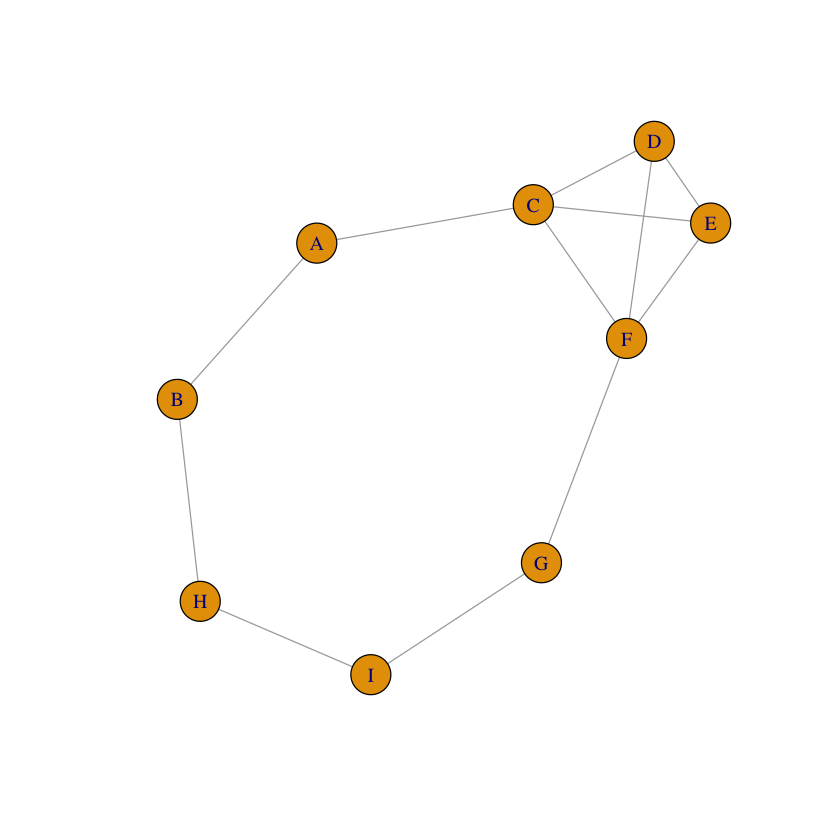

In [29]:
library("igraph")
G <- matrix(c(
    0, 1, 1, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0,
    1, 0, 0, 1, 1, 1, 0, 0, 0,
    0, 0, 1, 0, 1, 1, 0, 0, 0,
    0, 0, 1, 1, 0, 1, 0, 0, 0,
    0, 0, 1, 1, 1, 0, 1, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 1,
    0, 1, 0, 0, 0, 0, 0, 0, 1,
    0, 0, 0, 0, 0, 0, 1, 1, 0
), 9, 9)
V <- c("A", "B", "C", "D", "E", "F", "G", "H", "I")
dimnames(G) <- list(V, V)
G <- graph_from_adjacency_matrix(G, mode = "undirected")
G
plot(G)


### Definition of an Ising joint probability distribution

The distribution for the 9 binary variables associated with the nodes of the graph is assumed to be 
an Ising model defined by  
$$
p(x)  \propto \exp(\textstyle\frac{1}{2} x^T A x + x^T b), \quad x\in \{0,1\}^9
$$
where $A$ is a $9 \times 9$ symmetric matrix with entries $a_{ij}$ 
with a diagonal of zeros and $b$ is $9\times 1$ real vector with elements $b_j$. 
The Ising distribution is Markov with respect to the network $G$ if $a_{ij} = 0$ 
whenever the edge $i \sim j$ is missing. 

The functions of file `path_functions.R` are needed. Here the function`ising()` yields a 
$2^9$ vector `p` of the joint probabilities. 


In [30]:
source("path_functions.R")

In [31]:
X <- data.frame(expand.grid(rep(list(c(0, 1)), 9)))
colnames(X) <- V
v <- length(V)

A <- matrix(c(
  0, .2, .8, 0, 0, 0, 0, 0, 0,
  .2, 0, 0, 0, 0, 0, 0, .8, 0,
  .8, 0, 0, .4, .6, .9, 0, 0, 0,
  0, 0, .4, 0, .3, .2, 0, 0, 0,
  0, 0, .6, .3, 0, .5, 0, 0, 0,
  0, 0, .9, .2, .5, 0, .7, 0, 0,
  0, 0, 0, 0, 0, .7, 0, 0, .8,
  0, .8, 0, 0, 0, 0, 0, 0, .9,
  0, 0, 0, 0, 0, 0, .8, .9, 0
), 9, 9)
dimnames(A) <- list(V, V)
b <- c(0.1, 0.3, -0.2, 0.1, 0.1, 0.2, -0.6, 0.1, 0.2)

p <- ising(A, b) 
length(p)

[1] 512


#### Definitions of the derived binary variables

$$
\begin{aligned}
Z_\delta &= 1 \text{ if } (X_a=1, X_\delta = 1, X_b =1)\\
Z_{\bar{\delta}} &=1 \text{ if } X_{\rm rest} =1 \\
Y_\delta &= 1 \text{ if } (X_\delta = 1, X_{\rm rest} = 0)\\
\Psi_{ab} &= P(X_a = 1, X_\delta = 1, X_b = 1, X_{\rm rest} = 0) \\
          &= P(Y_\delta=1, X_a = 1, X_b = 1)\\
\Theta_{ab}  &= P(Y_\delta = 0, X_a = 1, X_b = 1)\\
\mu_{ab} &= P(X_a = 1, X_b = 1) = \Psi_{ab} + \Theta_{ab} \\
\pi_{\delta|ab} &= P(Y_\delta = 1 \mid X_a = 1, X_b = 1) = \Psi_{ab}/(\Psi_{ab} + \Theta_{ab})
\end{aligned}
$$ 

### Decomposition of the marginal probability $\mu_{ab}$

**Properties**

- Let the distribution of $(Y_\delta, X_a, X_b)$ be  $\pi^\delta$. Then
$$
\begin{aligned}
\Psi_{ab}  &= \pi^{\delta}_{111} \\
\Theta_{ab} &= \pi^\delta_{011} \\
\pi_{\delta|ab} &= \pi^\delta_{111}/(\pi^\delta_{011} + \pi^\delta_{111}) = \Psi_{ab}/(\Psi_{ab} + \Theta_{ab}) 
\end{aligned}
$$
- If the nodes $a$ and $b$ are not adjacent, $X_a$ is independent of $X_b$ given $Y_\delta =1$
$$
\displaystyle OR(X_a,X_b \mid X_\delta = 1) = \frac{\pi^\delta_{111} \pi^\delta_{100}}{\pi^\delta_{110} \pi^\delta_{101}} = 1
$$
- Let the distribution of $(Z_\delta, Z_{\bar\delta})$ be $\tilde\pi^\delta$. Then the Yule coefficient is 
$$
Y = (\sqrt{OR} - 1) / (\sqrt{OR} + 1)
$$
   where $OR = (\tilde\pi^\delta_{00}\tilde\pi^\delta_{11})/(\tilde\pi^\delta_{01}\tilde\pi^\delta_{10})$ is the odds-ratio.



#### Functions required

In [60]:
source("path_functions.R")

#### Define the graph 

IGRAPH 024af5c UN-- 9 12 -- 
+ attr: name (v/c)
+ edges from 024af5c (vertex names):
 [1] A--B A--C B--H C--D C--E C--F D--E D--F E--F F--G G--I H--I

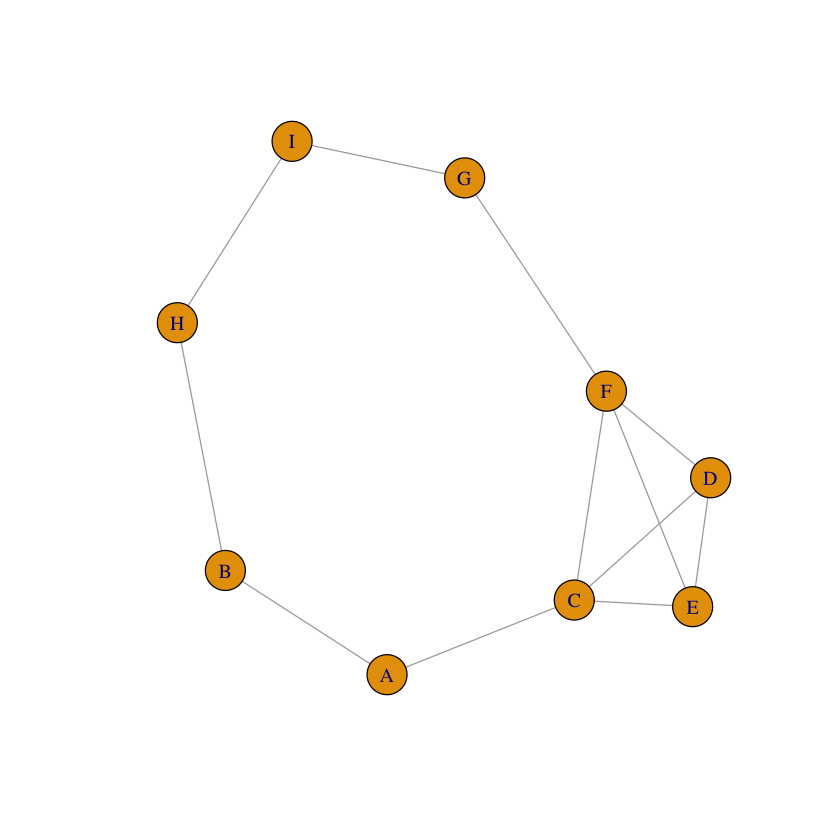

In [61]:
G <- matrix(c(
    0, 1, 1, 0, 0, 0, 0, 0, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0,
    1, 0, 0, 1, 1, 1, 0, 0, 0,
    0, 0, 1, 0, 1, 1, 0, 0, 0,
    0, 0, 1, 1, 0, 1, 0, 0, 0,
    0, 0, 1, 1, 1, 0, 1, 0, 0,
    0, 0, 0, 0, 0, 1, 0, 0, 1,
    0, 1, 0, 0, 0, 0, 0, 0, 1,
    0, 0, 0, 0, 0, 0, 1, 1, 0
), 9, 9)
V <- c("A", "B", "C", "D", "E", "F", "G", "H", "I")
dimnames(G) <- list(V, V)
G <- graph_from_adjacency_matrix(G, mode = "undirected")
G
plot(G)

#### Generate the Ising model defined by  the graph

In [62]:
A <- matrix(c(
  0, .2, .8, 0, 0, 0, 0, 0, 0,
  .2, 0, 0, 0, 0, 0, 0, .8, 0,
  .8, 0, 0, .4, .6, .9, 0, 0, 0,
  0, 0, .4, 0, .3, .2, 0, 0, 0,
  0, 0, .6, .3, 0, .5, 0, 0, 0,
  0, 0, .9, .2, .5, 0, .7, 0, 0,
  0, 0, 0, 0, 0, .7, 0, 0, .8,
  0, .8, 0, 0, 0, 0, 0, 0, .9,
  0, 0, 0, 0, 0, 0, .8, .9, 0
), 9, 9)
dimnames(A) <- list(V, V)

b <- c(0.1, 0.3, -0.2, 0.1, 0.1, 0.2, -0.6, 0.1, 0.2)

p <- ising(A,b)
length(p)

[1] 512

#### Find the paths between two nodes
The function `all_paths` finds all the paths between two nodes $a$ and $b$. Consider here the nodes $B$  and $F$ that are connected by 6 paths.

In [63]:
pall <- all_paths(G, "B", "F")
pall

Path:  B,A,C,D,E,F 
delta:  A,C,D,E 
rest:  G,H,I 

Path:  B,A,C,D,F 
delta:  A,C,D 
rest:  E,G,H,I 

Path:  B,A,C,E,D,F 
delta:  A,C,E,D 
rest:  G,H,I 

Path:  B,A,C,E,F 
delta:  A,C,E 
rest:  D,G,H,I 

Path:  B,A,C,F 
delta:  A,C 
rest:  D,E,G,H,I 

Path:  B,H,I,G,F 
delta:  H,I,G 
rest:  A,C,D,E 



[[1]]
[1] "B" "A" "C" "D" "E" "F"

[[2]]
[1] "B" "A" "C" "D" "F"

[[3]]
[1] "B" "A" "C" "E" "D" "F"

[[4]]
[1] "B" "A" "C" "E" "F"

[[5]]
[1] "B" "A" "C" "F"

[[6]]
[1] "B" "H" "I" "G" "F"

#### Product of odds-ratios for each path 
An important index is the product of the odds-ratios associated with the edges of a path.

In [64]:
path_prod_or(pall, A)

Path:  B,A,C,D,E,F 
1.22 2.23 1.49 1.35 1.65 omega:  9.03 not-omega:  134.29 
Path:  B,A,C,D,F 
1.22 2.23 1.49 1.22 omega:  4.95 not-omega:  244.69 
Path:  B,A,C,E,D,F 
1.22 2.23 1.82 1.35 1.22 omega:  8.17 not-omega:  148.41 
Path:  B,A,C,E,F 
1.22 2.23 1.82 1.65 omega:  8.17 not-omega:  148.41 
Path:  B,A,C,F 
1.22 2.23 2.46 omega:  6.69 not-omega:  181.27 
Path:  B,H,I,G,F 
2.23 2.46 2.23 2.01 omega:  24.53 not-omega:  49.4 


### Path decompositions

Each path between $a$ and $b$ is associated with two distributions:
- a $2^3$ distribution $p$ of $(Y_\delta, X_a, X_b)$
- a $2^2$ distribution $q$ of $(Z_\delta, Z_{\bar\delta})$

#### Distribution of $(Y_\delta, X_a, X_b)$ for the first path

The trivariate distribution $\pi^\delta$ is calculated below for the first path. Notice
that for the first path $\delta$ is not empty.

In [65]:
p_dab <- trivariate(pall[[1]], V, p)
p_dab

Yd,B,F,Freq
<fct>,<fct>,<fct>,<dbl>
0,0,0,0.0350138589
1,0,0,0.0006676899
0,1,0,0.1001226030
1,1,0,0.0011008345
0,0,1,0.2194362390
1,0,1,0.0040392885
0,1,1,0.6329598253
1,1,1,0.0066596609


Verify that $B$ is independent of $F$ given $Y_\delta =1$

In [66]:
pd <- p_dab$Freq
(pd[2] * pd[8]) / (pd[4] *pd[6])

[1] 1

Calculating  the distributions $\pi^\delta$ for each path as follows.

In [67]:
out <- matrix(0, 8, 6)
for(j in 1:6){
    out[, j] <- trivariate(pall[[j]], V, p)$Freq
}
colnames(out) <- 1:6
round(out,3)

1,2,3,4,5,6
0.035,0.035,0.035,0.035,0.036,0.035
0.001,0.000,0.001,0.000,0.000,0.000
0.100,0.101,0.100,0.101,0.101,0.100
0.001,0.000,0.001,0.000,0.000,0.001
0.219,0.223,0.219,0.222,0.223,0.223
0.004,0.001,0.004,0.001,0.000,0.001
0.633,0.638,0.633,0.637,0.639,0.637
0.007,0.001,0.007,0.002,0.001,0.002


#### Measures calculated from the trivariate distribution
The conditional probability  $\pi_{\delta|ab}$ is derived from the distribution $\pi^\delta$

In [68]:
measures3(p_dab)

pc         Psi       Theta 
0.010411911 0.006659661 0.632959825

#### Distribution of $(Z_\delta, Z_{\bar\delta})$ 

The distribution is denoted by $\tilde\pi^\delta$. For the first path the distribution is shown below.

In [69]:
p_dd <- bivariate(pall[[1]], V, p)
p_dd

V1,V2,Freq
<fct>,<fct>,<dbl>
0,0,0.4218346
1,0,0.1258521
0,1,0.3312796
1,1,0.1210336


We can calculate  the distributions $\tilde \pi^\delta$ for each path as follows.

In [70]:
out <- matrix(0, 4, 6)
for(j in 1:6){
    out[, j] <- bivariate(pall[[j]], V, p)$Freq
}
colnames(out) <- 1:6
round(out,3)

1,2,3,4,5,6
0.422,0.468,0.422,0.467,0.449,0.443
0.126,0.181,0.126,0.217,0.299,0.193
0.331,0.230,0.331,0.196,0.131,0.243
0.121,0.121,0.121,0.121,0.121,0.121


#### Measures calculated form the bivariate distribution

In [71]:
measures2(p_dd)

OR          Y 
1.22459617 0.05060951

### Normalization of the measures across the paths

The measures are normalized, for example
$$
\pi^*_{\delta|ab} = \frac{\pi_{\delta|ab}}{\sum_\delta \pi_{\delta|ab}}
$$
In the following table the first and last columns are the normalized weigths $\pi^*_{\delta|ab}$
and $\mathcal{Y^*_\delta}$. 


In [72]:
normalize <- function(x) x/sum(x)
out <- matrix(0,6, 5)
n <- length(pall)
for(j in 1:n){  
  pa <- pall[[j]]
  p_dab <- trivariate(pa, V, p)
  one <- measures3(p_dab)
  p_dd <- bivariate(pa, V, p)
  two <- measures2(p_dd)
  out[j,] <-  c(one, two)
}
out <- as.data.frame(out)
colnames(out) <- c("pc", "Psi", "Theta", "OR", "Yule")
out$pc <- normalize(out$pc)
out$Yule <- normalize(out$Yule)
round(out,2)

pc,Psi,Theta,OR,Yule
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.33,0.01,0.63,1.22,0.14
0.07,0.00,0.64,1.36,0.21
0.33,0.01,0.63,1.22,0.14
0.12,0.00,0.64,1.33,0.20
0.04,0.00,0.64,1.39,0.22
0.11,0.00,0.64,1.15,0.09


In [73]:
out <- matrix(0, 8, 6)
or <- matrix(0, 1, 6)
for(j in 1:length(pall)){
    out[, j] <- trivariate(pall[[j]], V, p)$Freq
    u <- out[,j]
    or[j] <- (u[2] * u[8]) / (u[4] * u[6])
}
colnames(out) <- 1:6
colnames(or) <- 1:6
round(out,3)
round(or,3)

1,2,3,4,5,6
0.035,0.035,0.035,0.035,0.036,0.035
0.001,0.000,0.001,0.000,0.000,0.000
0.100,0.101,0.100,0.101,0.101,0.100
0.001,0.000,0.001,0.000,0.000,0.001
0.219,0.223,0.219,0.222,0.223,0.223
0.004,0.001,0.004,0.001,0.000,0.001
0.633,0.638,0.633,0.637,0.639,0.637
0.007,0.001,0.007,0.002,0.001,0.002


1,2,3,4,5,6
1,1,1,1,1,1


### Logit parameters

Response $Y_\delta$, predictors $X_a$, $X_b$. Explicit solution.

In [45]:
u <- p_dab$Freq
beta <- logit_reg(u)
round(beta,4)

-4.7701
0.0578
-0.9398
-0.0092


Or using `glm`

In [46]:
m <- glm(Freq ~ Yd*B*F, family = quasipoisson, data = p_dab)
round(coefficients(m)[c(2,5,6,8)],4)

Yd1    Yd1:B1    Yd1:F1 Yd1:B1:F1 
  -4.7701    0.0578   -0.9398   -0.0092

### Study of other pairs of nodes

If the nodes are adjacent for each path the odds-ratios in the stratum $Y_\delta = 1$ 
are not 1. They are nevertheless all equal. 

In [94]:
pall <- all_paths(G, "A", "B")
p_dab<- trivariate(pall[[1]], V, p)
p_dab

Path:  A,B 
delta:   
rest:  C,D,E,F,G,H,I 

Path:  A,C,D,E,F,G,I,H,B 
delta:  C,D,E,F,G,I,H 
rest:   

Path:  A,C,D,F,G,I,H,B 
delta:  C,D,F,G,I,H 
rest:  E 

Path:  A,C,E,D,F,G,I,H,B 
delta:  C,E,D,F,G,I,H 
rest:   

Path:  A,C,E,F,G,I,H,B 
delta:  C,E,F,G,I,H 
rest:  D 

Path:  A,C,F,G,I,H,B 
delta:  C,F,G,I,H 
rest:  D,E 



Yd,A,B,Freq
<fct>,<fct>,<fct>,<dbl>
0,0,0,8.205318e-02
1,0,0,7.398215e-05
0,1,0,1.769481e-01
1,1,0,8.176292e-05
0,0,1,2.038237e-01
1,0,1,9.986546e-05
0,1,1,5.367845e-01
1,1,1,1.348043e-04


In [95]:
u <- p_dab$Freq
(u[2] * u[8]) / (u[4] * u[6])

[1] 1.221403

In [96]:
d <- length(pall)
out <- matrix(0, 8, d)
or <- matrix(0, 1, d)
for(j in 1:length(pall)){
    out[, j] <- trivariate(pall[[j]], V, p)$Freq
    u <- out[,j]
    or[j] <- (u[2] * u[8]) / (u[4] * u[6])
}
colnames(out) <- 1:d
colnames(or) <- 1:d
round(out,3)
round(or,3)


1,2,3,4,5,6
0.082,0.069,0.079,0.069,0.077,0.081
0.000,0.013,0.003,0.013,0.005,0.001
0.177,0.144,0.170,0.144,0.165,0.173
0.000,0.033,0.007,0.033,0.012,0.004
0.204,0.164,0.195,0.164,0.189,0.199
0.000,0.040,0.009,0.040,0.015,0.004
0.537,0.416,0.510,0.416,0.492,0.524
0.000,0.121,0.027,0.121,0.045,0.013


1,2,3,4,5,6
1.221,1.221,1.221,1.221,1.221,1.221
